# Linear Least Squares

## Simplest case


We will consider simple real example of linear regression on World Bank data.

In [31]:
# World bank data https://data.worldbank.org/
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset = pd.read_csv('https://raw.githubusercontent.com/MerkulovDaniil/sber21_fmin/sources/data/world_bank_data.csv')
dataset.tail()

,Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export,Corruption,GovEff,PolSta,adult_mortality,Male,Female
12052,Kosovo,XKX,2018,4302.276483,NaN,NaN,NaN,NaN,NaN,NaN,-0.519039,-0.428305,-0.605489,NaN,NaN,NaN
12053,"Yemen, Rep.",YEM,2018,944.408499,NaN,53.977853,NaN,NaN,NaN,NaN,-1.637971,-2.244354,-3.002496,NaN,NaN,NaN
12054,South Africa,ZAF,2018,6374.028196,NaN,47.630120,NaN,NaN,NaN,NaN,-0.021569,0.340379,-0.276673,NaN,NaN,NaN
12055,Zambia,ZMB,2018,1539.900158,86.74796,23.341479,NaN,NaN,NaN,NaN,-0.656137,-0.559209,0.141994,NaN,NaN,NaN
12056,Zimbabwe,ZWE,2018,2146.996385,NaN,37.324591,NaN,NaN,NaN,NaN,-1.235616,-1.198860,-0.707054,NaN,NaN,NaN


Suppose, we are given the set of $m$ pairs $(x_i, y_i)_{i=1}^m$. We are to construct linear predictions of the following form:

$$
y_i^{pred} = k x_i
$$

We will start with the simple example of Import/Export prediction:

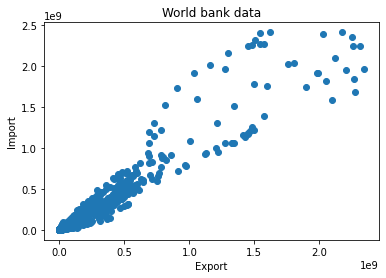

In [4]:
y_variable = 'Import'
x_variable = 'Export'
clean_data = dataset[[x_variable, y_variable]].dropna()
plt.scatter(clean_data[x_variable], clean_data[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.show()

We need to select hyperparameters $k$, that minimize sum of squared errors:

$$ \tag{Loss}
L(k) = \sum\limits_{i=1}^m (y_i^{pred} - y_i)^2 = \sum\limits_{i=1}^m (kx_i - y_i)^2 \to \min_{k \in \mathbb{R}}
$$

Write down the following derivative of the loss function:
* $\frac{\partial L}{\partial k} = $

Find the optimal value of $k$ from setting the corresponding derivative to zero:
* $\frac{\partial L}{\partial k} = 0 \rightarrow k = $\frac{\partial \sum\limits_{i=1}^m y_i}{\partial \sum\limits_{i=1}^m x_i} $ 

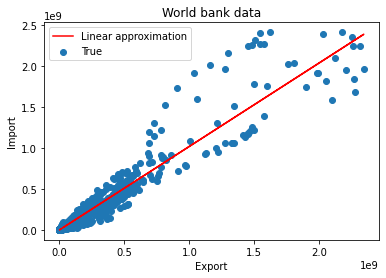

In [12]:
y_variable = 'Import'
x_variable = 'Export'

clean_data = dataset[[x_variable, y_variable]].dropna()

x_data = clean_data[x_variable]
y_data = clean_data[y_variable]

#=== Write down optimal k here ===
k = y_data.sum() / x_data.sum()
#=================================
y_pred = k*x_data

plt.scatter(x_data, y_data, label = 'True')
plt.plot(x_data, y_pred, 'r-', label = 'Linear approximation')

plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.legend()
plt.show()

Let's compare with the built-in implementation:

In [13]:
k

1.019948379888818

In [10]:
A = np.vstack([x_data, np.ones(len(x_data))]).T
k, b = np.linalg.lstsq(A, y_data, rcond=None)[0]
print(f'k = {k}, b = {b}')

k = 1.0312958739168514, b = -923609.0654769217


Analytic results: k = 1.019948379888818
Numpy results: k = 1.0312958739168514, b = -923609.0654769217


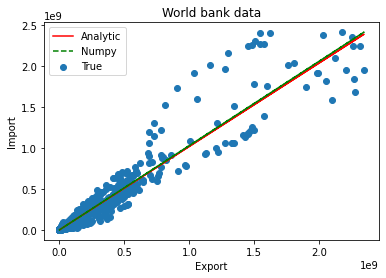

In [14]:
y_variable = 'Import'
x_variable = 'Export'

clean_data = dataset[[x_variable, y_variable]].dropna()

x_data = clean_data[x_variable]
y_data = clean_data[y_variable]

#=== Write down optimal k here ===
k = y_data.sum() / x_data.sum()
print(f'Analytic results: k = {k}')
#=================================
y_pred = k*x_data

A = np.vstack([x_data, np.ones(len(x_data))]).T
k_np, b_np = np.linalg.lstsq(A, y_data, rcond=None)[0]
print(f'Numpy results: k = {k_np}, b = {b_np}')

plt.scatter(x_data, y_data, label = 'True')
plt.plot(x_data, y_pred, 'r-', label = 'Analytic')
plt.plot(x_data, k_np*x_data + b_np, 'g--', label = 'Numpy')

plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.legend()
plt.show()

What is the biggest difference between two approaches above?

## "Nonlinear" linear least squares

Let's take a look at the following graph:

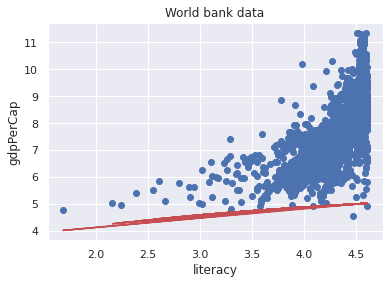

In [49]:
y_variable = 'gdpPerCap'
x_variable = 'literacy'

clean_data = dataset[[x_variable, y_variable]].dropna()

x_data = clean_data[x_variable]
y_data = clean_data[y_variable]

def fit_exp(xs, ys):
    S_x2_y = 0.0
    S_y_lny = 0.0
    S_x_y = 0.0
    S_x_y_lny = 0.0
    S_y = 0.0
    for (x,y) in zip(xs, ys):
        S_x2_y += x * x * y
        S_y_lny += y * np.log(y)
        S_x_y += x * y
        S_x_y_lny += x * y * np.log(y)
        S_y += y
    #end
    a = (S_x2_y * S_y_lny - S_x_y * S_x_y_lny) / (S_y * S_x2_y - S_x_y * S_x_y)
    b = (S_y * S_x_y_lny - S_x_y * S_y_lny) / (S_y * S_x2_y - S_x_y * S_x_y)
    return (np.exp(a), b)


(A, B) = fit_exp(x_data, y_data)
# k = np.log(y_data).sum() / np.log(x_data).sum()
k = B + A
y_pred = k*np.log(x_data)

plt.plot(np.log(x_data), np.log(y_pred), 'r-', label = 'Logarithm approximation')

plt.scatter(np.log(x_data), np.log(y_data))
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.show()

Explain how one can use linear regression to solve this problem? Note, that direct using of code above is not acceptable, because the data on the graph are not linearly dependent.

In [ ]:
# Your code here

## Extra: time comparison of linear least squares using different approaches.

Please, compare different approaches of solving random linear systems in terms of time.

In [35]:
# Imports and definitions.
import cvxpy as cp
import numpy as np
import time
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

def solve_lls_cvxpy(X, y):
  m,n = X.shape
  theta = cp.Variable(n)
  cost = cp.sum_squares(X*theta - y)
  prob = cp.Problem(cp.Minimize(cost))
  prob.solve()
  return theta.value

def solve_lls_exact(X, y):
  return np.linalg.pinv(X) @ y

def solve_lls_exact_man(X, y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

def solve_lls_chol(X, y):
    res = scipy.linalg.cho_factor(X.T @ X, lower=True)
    return scipy.linalg.cho_solve(res, X.T @ y)

def solve_lls_qr(X, y):
    Q, R = scipy.linalg.qr(X)
    return scipy.linalg.solve_triangular(R, Q.T @ y)

def solve_lls_np_lstsq(X, y):
    return np.linalg.lstsq(X, y, rcond=None)

def plot_timing(ns, time_arrays, labels):
  for time_array, label in zip(time_arrays, labels):
    plt.semilogy(ns, time_array, label=label)

  plt.title('Random square linear system')
  plt.ylabel('Time, s')
  plt.xlabel(r'$n$, dimension of the problem')    
  plt.legend()
  plt.plot()

  return None

In [36]:
n = 100
print(f'Solving for n = {n}')
X = np.random.randn(n, n)
y = np.random.randn(n)

start_time = time.time()
solve_lls_np_lstsq(X, y)
end_time = time.time()
print(f'Numpy lstsq time {end_time - start_time}')

Solving for n = 100
Numpy lstsq time 0.011227607727050781


In [38]:
np.random.seed(1)
times_cvxpy     = []
times_exact     = []
times_exact_man = []
times_chol      = []
times_qr        = []
times_lstsq     = []

labels = ['cvxpy', 'pinv', 'exact', 'chol', 'qr', 'numpy lstsq']

###################
# Your code here  #
###################

plot_timing(ns, [times_cvxpy, times_exact, times_exact_man, times_chol, times_qr, times_lstsq], labels)
plt.savefig('lls_times.svg')

<Figure size 432x288 with 0 Axes>